In [2]:
!pip install yfinance

In [2]:
#First we need to import yahoo finance to get the date we need
import yfinance as yf
import pandas as pd
import os

In [3]:
#Look for tesla ticker
tesla = yf.Ticker("TSLA")
tesla

yfinance.Ticker object <TSLA>

In [4]:
#get tesla history numbers, we're not going to use dividends and stock splits
tesla_history = tesla.history(period="max")
tesla_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2022-08-09,870.880005,877.190002,838.059998,850.000000,28748200,0,0.0
2022-08-10,891.200012,892.530029,850.109985,883.070007,31639600,0,0.0
2022-08-11,889.539978,894.710022,857.500000,859.890015,23385000,0,0.0


In [5]:
#check data types
tesla_history.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits    float64
dtype: object

<AxesSubplot:xlabel='Date'>

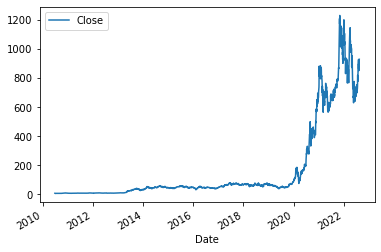

In [6]:
#plot teslas's history putting the Close column as the Y and the date as the X
tesla_history.plot.line(y="Close", use_index=True)

In [7]:
#I made a Df, not sure if its necessary
tesla_df = pd.DataFrame(tesla_history)
tesla_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2022-08-09,870.880005,877.190002,838.059998,850.000000,28748200,0,0.0
2022-08-10,891.200012,892.530029,850.109985,883.070007,31639600,0,0.0
2022-08-11,889.539978,894.710022,857.500000,859.890015,23385000,0,0.0


In [8]:
#drop columns that we don't need
tesla_drop = tesla_df.drop(columns =['Dividends', 'Stock Splits'])
tesla_drop.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,34334500
2010-07-07,3.280,3.326,2.996,3.160,34608500
2010-07-08,3.228,3.504,3.114,3.492,38557000
2010-07-09,3.516,3.580,3.310,3.480,20253000
2010-07-12,3.590,3.614,3.400,3.410,11012500


In [9]:
#Add a column to show tomorrows price 
tesla_drop['Tomorrow'] = tesla_drop['Close'].shift(-1)
tesla_drop.tail(10)

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2022-08-02,882.010010,923.500000,878.000000,901.760010,31859200,922.190002
2022-08-03,915.000000,928.650024,903.450012,922.190002,26697000,925.900024
2022-08-04,933.000000,940.820007,915.000000,925.900024,24085400,864.510010
2022-08-05,908.010010,913.820007,856.630005,864.510010,37655300,871.270020
2022-08-08,885.000000,915.599976,867.260010,871.270020,32998000,850.000000
2022-08-09,870.880005,877.190002,838.059998,850.000000,28748200,883.070007
2022-08-10,891.200012,892.530029,850.109985,883.070007,31639600,859.890015
2022-08-11,889.539978,894.710022,857.500000,859.890015,23385000,900.090027
2022-08-12,868.250000,900.479980,855.099976,900.090027,26443300,927.960022


In [10]:
#add a column where we're going to put the target prediction
#we want to know if tomorrow's price is bigger than the closing price, it would return a boolean (STRING)
#IMPORTANT CHANGE COLUMN TO INTEGER SO IT CAN BE USED IN MACHINE LEARNING
# 1 would be TRUE and 0 would be FALSE

tesla_drop['Target'] = (tesla_drop['Tomorrow'] > tesla_drop['Close']).astype(int)

tesla_drop.head(10)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,4.766,0
2010-06-30,5.158,6.084,4.660,4.766,85935500,4.392,0
2010-07-01,5.000,5.184,4.054,4.392,41094000,3.840,0
2010-07-02,4.600,4.620,3.742,3.840,25699000,3.222,0
2010-07-06,4.000,4.000,3.166,3.222,34334500,3.160,0
2010-07-07,3.280,3.326,2.996,3.160,34608500,3.492,1
2010-07-08,3.228,3.504,3.114,3.492,38557000,3.480,0
2010-07-09,3.516,3.580,3.310,3.480,20253000,3.410,0
2010-07-12,3.590,3.614,3.400,3.410,11012500,3.628,1


In [11]:
#If we make a prediction taking all the years since 2010 would it be a good idea?
#would it affect the prediction?
#when would it be a good year to start?
#.copy() is for avoid future warnings

tesla_drop = tesla_drop.loc['2017-01-01':].copy()
tesla_drop.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,29616500,45.397999,1
2017-01-04,42.950001,45.599998,42.862000,45.397999,56067500,45.349998,0
2017-01-05,45.284000,45.495998,44.389999,45.349998,29558500,45.801998,1
2017-01-06,45.386002,46.062000,45.090000,45.801998,27639500,46.256001,1
2017-01-09,45.793999,46.383999,45.599998,46.256001,19897500,45.973999,0


In [12]:
#train our first machine model
#RandomForest is my favorite model, my default
#RandomForest work with random desicion trees with randomized parameters and averaging the results
#RandomForest are resistant to overfitting and they are quick 
#RandomForest can pick up NON linear relationships and in stock, this is the case

from sklearn.ensemble import RandomForestClassifier


In [13]:
#n_estimators is the number of individual decision trees to train (the higher, the better the accuracy)
#min_samples_split this protect us from overfitting (the higher, less accuracy)
#random_state help us to get the same results each time we run the model
#NOTE: THIS IS TIME SERIES DATA you can't use crossvalidation 

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)


#here we're going to train all rows except the last 100
#for the test we're going to use only the last 100 rows

train = tesla_drop.iloc[:-100]
test = tesla_drop.iloc[-100:]

In [14]:
#we're using as predictors all of our columns and see if they can predict our target

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
#it's important to check how accurate our model work, did the market go up when the model say so?
#this is a good error metric

from sklearn.metrics import precision_score

#we're going to generate predictions using our model, the results are going to be in an array
pred_target = model.predict(test[predictors])
pred_target

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [16]:
#working with an array is hard so we need to convert to a pandas series to be easy to read
import pandas as pd
pred_target = pd.Series(pred_target, index=test.index)
pred_target

Date
2022-03-23    1
2022-03-24    0
2022-03-25    0
2022-03-28    1
2022-03-29    0
             ..
2022-08-09    1
2022-08-10    1
2022-08-11    0
2022-08-12    1
2022-08-15    1
Length: 100, dtype: int32

In [17]:
# we're goin to check the precision score using the REAL target and the predictect target 
# RESULT: only 55% of the time our model is correct :(
precision_score(test["Target"], pred_target)

0.5522388059701493

<AxesSubplot:xlabel='Date'>

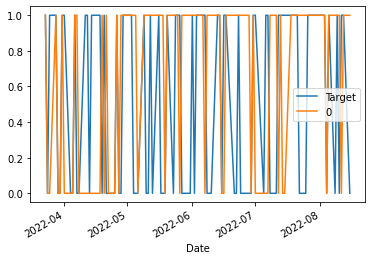

In [18]:
#we're going to plot the real target and the target predictions to compare
combined = pd.concat([test["Target"], pred_target], axis=1)
combined.plot()

In [24]:
#we're goin to make a more robust way to check our algorithm 
#right now we're only working with the last 100 days it would be better to check yearly to have more confidence 
# we're going to do a BACK TESTING
#create a prediction function that will wrap up everything STEP we did before

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    pred_target = model.predict(test[predictors])
    #added a series name "Predictions"
    pred_target = pd.Series(pred_target, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], pred_target], axis=1)
    return combined

#the result would give us a series with the real target and the prediction target

In [25]:
# testing function
prueba = predict(train=tesla_drop.iloc[:-100], test= tesla_drop.iloc[-100:], model=model, predictors=predictors)
prueba

,Target,Predictions
Date,,
2022-03-23,1,1
2022-03-24,0,0
2022-03-25,1,0
2022-03-28,1,1
2022-03-29,0,0
...,...,...
2022-08-09,1,1
2022-08-10,0,1
2022-08-11,1,0


In [26]:
#we're going to write a BACK TEST function
#we need to determine our start and step for trainning our first model
#NOTE: every trading year has around 250 days!!! 
#we're going to take 2 years of data and train the first model (250*2 = 500) 
#The step is going to take a year and then go to the next year and so on.
#IT WOULD PREDICT THE 3RD YEAR AND WITH THE VALUES WE'LL PREDICT THE 4TH YEAR AND SO ON
#we'll get predictions for more years to get confidence

def backtest(data, model, predictors, start=500, step=250):
    #create a list of dataframes with the predictionsfor a single year
    all_predictions = []
     
    #loop across the data year by year except the first 2 or what its needed.    
    for i in range(start, data.shape[0], step):
        
        #Created a train set and testsed, used copy() to avoid errors
        #train set: all of the years prior to the current year
        train = data.iloc[0:i].copy()
        #test set: current year
        test = data.iloc[i:(i+step)].copy()
        #generate predictions
        predictions = predict(train, test, predictors, model)
        #append all predictions to the diven year
        all_predictions.append(predictions)
    
    #cancatenate all predictions together, list of DF
    return pd.concat(all_predictions)

In [27]:
#back test our data
predictions = backtest(tesla_drop, model, predictors)

In [28]:
#look how many days we predicted the market would go up vs down 
predictions["Predictions"].value_counts()

1    595
0    319
Name: Predictions, dtype: int64

In [31]:
#look how many days we predicted the market would go up vs down 
predictions["Target"].value_counts()

1    496
0    418
Name: Target, dtype: int64

In [29]:
#check the precision score
#RESULT: why does it went down???? :(
precision_score(predictions["Target"], predictions["Predictions"])

0.5394957983193277

In [30]:
# let's check the percentage where the market actually went up
predictions["Target"].value_counts() / predictions.shape[0]

1    0.54267
0    0.45733
Name: Target, dtype: float64

# ADDITIONAL PREDICTORS

In [ ]:
#we need to improve our accuracy
#create a varaity of rolling averages
